In [1]:
import Agents
import Markets

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

def add_price_data(df, t):
    
    pA_buy, pA_sell, pB_buy, pB_sell = df

    pA_buy[t] = agent_list[0].p_buy
    pA_sell[t] = agent_list[0].p_sell

    pB_buy[t] = agent_list[1].p_buy
    pB_sell[t] = agent_list[1].p_sell



In [2]:
def add_quant_data(df, t):

    QA_df, QB_df = df

    QA_df[t] = agent_list[0].Q
    QB_df[t] = agent_list[1].Q
    
    #print(agent_list[0].Q)
    
def add_deficit_data(df, t):

    DA_df, DB_df = df

    DA_df[t] = agent_list[0].D
    DB_df[t] = agent_list[1].D
    
def add_money_data(M_df, t):
    
    M_df[t,0] = agent_list[0].M
    M_df[t,1] = agent_list[1].M
    
def reset():
    
    agent_list[0].Q = QA
    agent_list[0].D = DA
    agent_list[1].Q = QB
    agent_list[1].D = DB
    
    market.reset()
    
    agent_list[0].p_buy = [20,20]#np.random.uniform(M, size=n) #[15, 10]
    agent_list[0].p_sell = [10,10]#np.random.uniform(M, size=n) #[25, 30]

    agent_list[1].p_buy = [20,20]#np.random.uniform(M, size=n) #[10, 15]
    agent_list[1].p_sell = [10,10]#np.random.uniform(M, size=n) #[30, 25]

In [3]:
def plot_market(i, *, ps=10, log=False):

    f, ax = plt.subplots(1, figsize=(10,4)) #(2,1)

    ax.plot(ME_df[:,i], c='C0', label=f'$\Delta M_{i}$')
    ax.plot(QE_df[:,i], c='C1', label=f'$\Delta Q_{i}$')
    ax.plot(ntries_df, c='k', label='Tries', lw='0.5')

    p = ME_df[:,i]/QE_df[:,i]
    ax.scatter(np.arange(0,T), p, c='g', label='f$p_{i}$', s=ps)

    ax.legend()
    
    if log:
        plt.yscale('log')
        
    plt.title(f'Market for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('$M$, $Q$')


def plot_prices(p_df, i, *, ps=10, log=False, includeM=True):

    'A sells i=0 and buys i=1, and vice versa for B'

    if i == 0:
        plt.plot(p_df[1][:,i], c='C0', ls='-.', label=f"A's Selling Price for {i}")
        plt.plot(p_df[2][:,i], c='C1', ls='-', label=f"B's Buying Price for {i}")

    elif i == 1:
        plt.plot(p_df[0][:,i], c='C0', ls='-', label=f"A's Buying Price for {i}")
        plt.plot(p_df[3][:,i], c='C1', ls='-.', label=f"B's Selling Price for {i}")

    if includeM:
        plt.plot(M_df[:,0], c='C0', ls=':', lw=0.5, label=f'$M_A$')
        plt.plot(M_df[:,1], c='C1', ls=':', lw=0.5, label=f'$M_B$')
    
    p = ME_df[:,i]/QE_df[:,i]
    plt.scatter(np.arange(T)+0.5, p, c='g', s=ps)
    
    plt.legend()
    
    if log:
        plt.yscale('log')

    plt.title(f'Market Prices for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Prices')
    
def plot_quantities(Q_df, D_df, i):

    plt.plot(Q_df[0][:,i], c='C0', ls='-', label=f"A's Q{i}")
    plt.plot(D_df[0][:,i], c='C0', ls=':', label=f"A's D{i}")

    plt.plot(Q_df[1][:,i], c='C1', ls='-', label=f"B's Q{i}")
    plt.plot(D_df[1][:,i], c='C1', ls=':', label=f"B's D{i}")

    plt.legend()

    plt.title(f'Quantities for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Q,D')


In [4]:
N = 2
M = 100/N

n = 2

QA = np.array([100, 0]).copy()
QB = np.array([0, 100]).copy()

DA = np.array([0, 50]).copy()
DB = np.array([50, 0]).copy()

cg = np.array([1, 1])

In [5]:
agent_list = [Agents.Agent(QA.copy(), DA, M, n_actions=1, input_dims=[1]),
              Agents.Agent(QB.copy(), DB, M, n_actions=1, input_dims=[1])] 

In [6]:
verbose = True
alpha = 0.1
beta = 0.1
gamma = 1.00
epsilon = 0.00
max_agent_tries = 1
max_tries = N*max_agent_tries

In [7]:
market = Markets.Marketv3(n, verbose=verbose, minimum_price = 0.001, alpha=alpha, beta=beta, gamma=gamma, epsilon=epsilon, max_agent_tries=max_agent_tries, max_tries=max_tries)
print(f'Market has {max_tries} max tries')

ExchangeDict = {agent_list[0]: 2, agent_list[1]: 2}

Market has 2 max tries


In [8]:
T = 100 #200

reset()

# Setup data
pA_buy, pA_sell, pB_buy, pB_sell = np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2))
p_df = (pA_buy, pA_sell, pB_buy, pB_sell)

QA_df, QB_df = np.zeros((T, 2)), np.zeros((T, 2))
Q_df = (QA_df, QB_df)

DA_df, DB_df = np.zeros((T, 2)), np.zeros((T, 2))
D_df = (DA_df, DB_df)

M_df = np.zeros((T,2))

ME_df = np.zeros((T,2))
QE_df = np.zeros((T,2))
sE_df = np.zeros((T,2))
ntries_df = []


add_price_data(p_df, 0)
add_quant_data(Q_df, 0)
add_deficit_data(D_df, 0)
add_money_data(M_df, 0)

# Run market
for t in range(T-1):
    
    # Market action occurs at half-time interval
    ME, QE, stn_dev, ntries = market.run_exchange(ExchangeDict)
    
    # Reset quantities
    #agent_list[0].Q = QA.copy()#*np.exp(-0.1*t)
    #agent_list[1].Q = QB.copy()#*np.exp(-0.1*t)
    #agent_list[0].D = DA.copy()#*t
    #agent_list[1].D = DB.copy()*t
    
    #print(QA, agent_list[0].Q)
    
    add_price_data(p_df, t+1)
    add_quant_data(Q_df, t+1)
    add_deficit_data(D_df, t+1)
    add_money_data(M_df, t+1)
    
    # Market action occurs at half-time interval
    ME_df[t] = ME
    QE_df[t] = QE
    sE_df[t] = stn_dev
    ntries_df.append(ntries)

---Begin Exchanging---

--Attempt An Exchange--
1

Buyer:     <Agents.Agent object at 0x000002D6797F1180>
Buyer E:   50.000
Seller:    <Agents.Agent object at 0x000002D6797F3640>
Seller E:  -100.000

Set Prices and Try an Exchange...

Buyer Price:   20.000
Seller Price:  10.000

-Scenario 2-
Enact Exchange
-Buyer Price 20.000 higher than Seller Price 10.000-

     -Exchanging-
     Commodity 1
     pmax_buyer:     20.000
     pmin_seller:    10
     Settled Price:  17.736901287132238

     Buyer Money:    50.000
     Buyer Deficit:  [-100   50]

     Seller Money:   50.000
     Seller Deficit: [  50 -100]

     -Swap Items 1-
     Market M 1:  17.737
     Market Q 1:  1.0
     Market p 1:  17.737

     Buyer Money:    32.263
     Buyer Deficit:  [-100   49]

     Seller Money:   67.73690128713224
     Seller Deficit: [ 50 -99]
                ------------                  

     Dec. Buyer Price to 18.000 and inc. Seller Price to 11.000

...After Trying Exchange, Set New Agent Prices
N

C:\Users\Alex\Documents\Research\EconoNet\v1\Markets.py:316: RuntimeWarning: invalid value encountered in scalar divide
  _m = _P/_n
C:\Users\Alex\Documents\Research\EconoNet\v1\Markets.py:491: RuntimeWarning: invalid value encountered in divide
  avg_price = self.monetary_exchanged/self.quantity_exchanged


In [9]:
plt.rcParams['figure.dpi'] = 100

C:\Users\Alex\AppData\Local\Temp\ipykernel_25128\1498340516.py:9: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


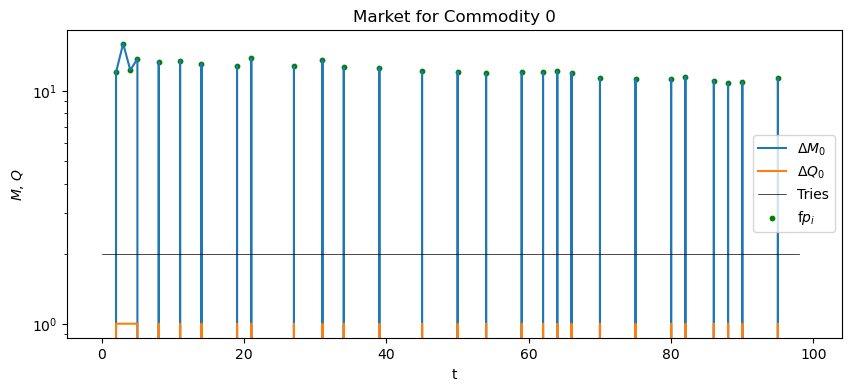

In [10]:
plot_market(0, log=True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_25128\1498340516.py:9: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


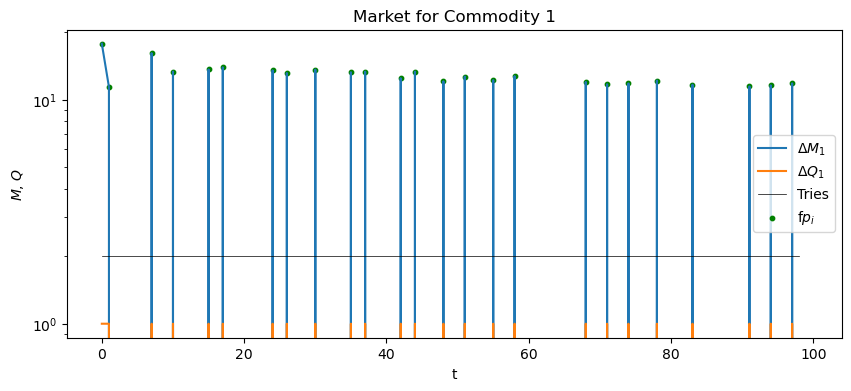

In [11]:
plot_market(1, log=True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_25128\1498340516.py:38: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


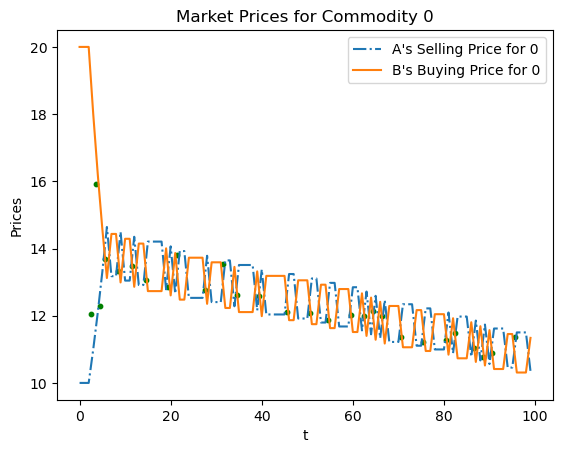

In [12]:
plot_prices(p_df, 0, log=False, includeM=False)

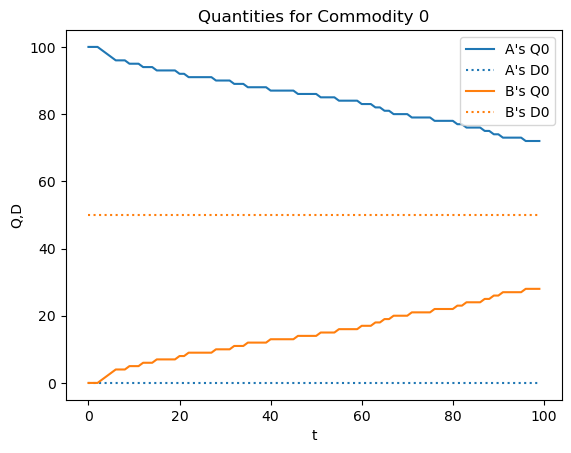

In [13]:
plot_quantities(Q_df, D_df, 0)

C:\Users\Alex\AppData\Local\Temp\ipykernel_25128\1498340516.py:38: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


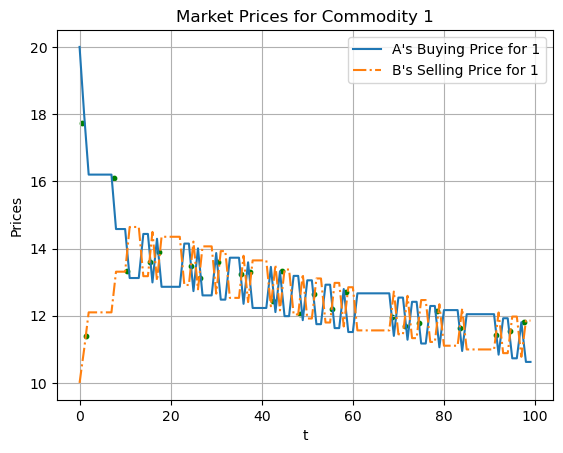

In [14]:
plot_prices(p_df, 1, log=False, includeM=False)
plt.grid()

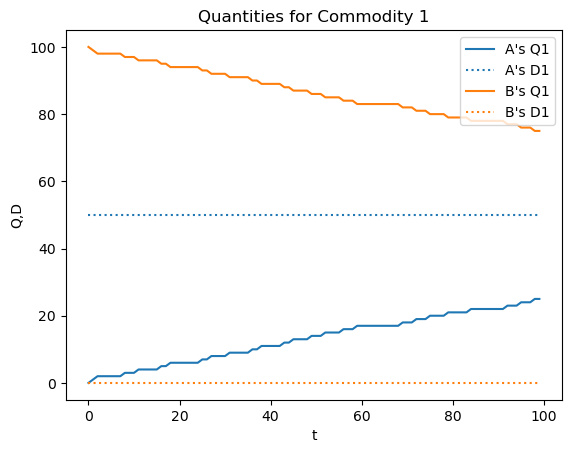

In [15]:
plot_quantities(Q_df, D_df, 1)

This scheme won't work when the price is zero. 

Because $p' = p_0 (1+\alpha)$ will equal zero when $p_0$ is zero